## Qualitative Analysis for Event Log with some Randomness

Implemented decision points with guards:
- Request Manager or Standard Approval:
    - Request Manager Approval if total_price >= 800
    - Request Standard Approval if total_price <= 1000
- Manager Rejection or Approval:
    - Manager Rejection if total_price >= 500 and random_exponential(100, 200) > 120
    - No Guard for Manager Approval 
- Standard Rejection or Approval:
    - Standard Rejection if total_price >= 500 and random_exponential(100, 200) > 120
    - No Guard for Standard Approval 

In [1]:
import os
from exdpn.util import import_log
from exdpn.data_petri_net import data_petri_net
from exdpn.guards import ML_Technique

#### First, look which machine learning guard has the highest performance for a decision point.

In [2]:
event_log_base = import_log(os.path.join(os.getcwd(), "..", 'datasets', 'p2p_base.xes'))
dpn_base = data_petri_net.Data_Petri_Net(event_log = event_log_base, 
                                                  event_level_attributes = ['item_category','item_id','item_amount','supplier','total_price'],
                                                  verbose = False)

decision_points = list(dpn_base.decision_points)
decision_points

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


[({'create purchase order'}, {'request manager approval', 'request standard approval'}),
 ({'request standard approval'}, {'approve purchase', 'reject purchase'}),
 ({'request manager approval'}, {'manager approve purchase', 'manager reject purchase'})]

Decision point:  ({'create purchase order'}, {'request manager approval', 'request standard approval'})
Best guard: <exdpn.guards.decision_tree_guard.Decision_Tree_Guard object at 0x000001BC2485B580>


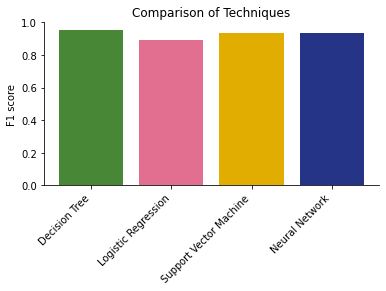

In [3]:
print("Decision point: ", decision_points[0])
dpn_base.guard_manager_per_place[decision_points[0]].get_comparison_plot()
best_guard = dpn_base.get_guard_at_place(decision_points[0])
print("Best guard:", best_guard)

Decision point:  ({'request standard approval'}, {'approve purchase', 'reject purchase'})
Best guard: <exdpn.guards.decision_tree_guard.Decision_Tree_Guard object at 0x000001BC2485B970>


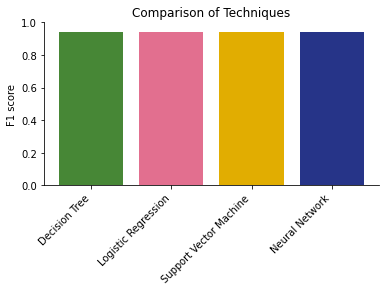

In [4]:
print("Decision point: ", decision_points[1])
dpn_base.guard_manager_per_place[decision_points[1]].get_comparison_plot()
best_guard = dpn_base.get_guard_at_place(decision_points[1])
print("Best guard:", best_guard)

Decision point:  ({'request manager approval'}, {'manager approve purchase', 'manager reject purchase'})
Best guard: <exdpn.guards.decision_tree_guard.Decision_Tree_Guard object at 0x000001BC249B05B0>


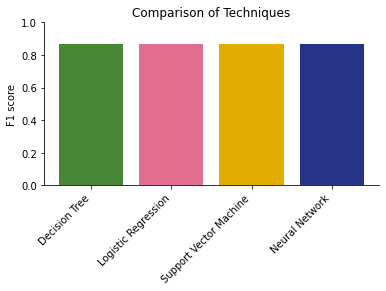

In [5]:
print("Decision point: ", decision_points[2])
dpn_base.guard_manager_per_place[decision_points[2]].get_comparison_plot()
best_guard = dpn_base.get_guard_at_place(decision_points[2])
print("Best guard:", best_guard)

### Decision Tree 

In [6]:
# import event log and create data petri net
event_log_base = import_log(os.path.join(os.getcwd(), '..', 'datasets', 'p2p_base.xes'))
dpn_base = data_petri_net.Data_Petri_Net(event_log = event_log_base, 
                                                  event_level_attributes = ['item_category','item_id','item_amount','supplier','total_price'],
                                                  ml_list = [ML_Technique.DT],
                                                  verbose = False)

decision_points = list(dpn_base.decision_points)

Decision point:  ({'create purchase order'}, {'request manager approval', 'request standard approval'})


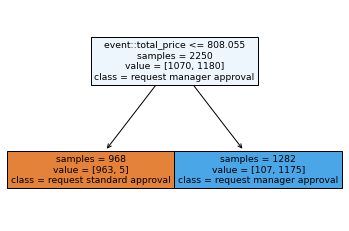

In [7]:
print("Decision point: ", decision_points[0])
dt_guard = dpn_base.get_guard_at_place(decision_points[0])
if dt_guard.is_explainable():
    dt_guard.get_explainable_representation()

Decision point:  ({'request standard approval'}, {'approve purchase', 'reject purchase'})


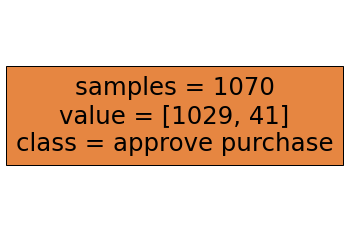

In [8]:
print("Decision point: ", decision_points[1])
dt_guard = dpn_base.get_guard_at_place(decision_points[1])
if dt_guard.is_explainable():
    dt_guard.get_explainable_representation()

Decision point:  ({'request manager approval'}, {'manager approve purchase', 'manager reject purchase'})


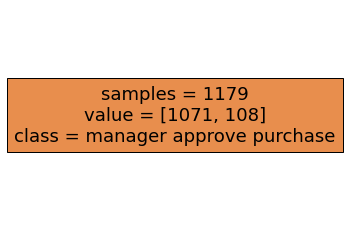

In [9]:
print("Decision point: ", decision_points[2])
dt_guard = dpn_base.get_guard_at_place(decision_points[2])
if dt_guard.is_explainable():
    dt_guard.get_explainable_representation()

### Neural Network 

In [10]:
# import event log and create data petri net
event_log_base = import_log(os.path.join(os.getcwd(), '..', 'datasets', 'p2p_base.xes'))
dpn_base = data_petri_net.Data_Petri_Net(event_log = event_log_base,
                                                  event_level_attributes = ['item_category','item_id','item_amount','supplier','total_price'],
                                                  ml_list = [ML_Technique.NN],
                                                  verbose = False)

decision_points = list(dpn_base.decision_points)

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Decision point:  ({'request standard approval'}, {'approve purchase', 'reject purchase'})


  0%|          | 0/100 [00:00<?, ?it/s]

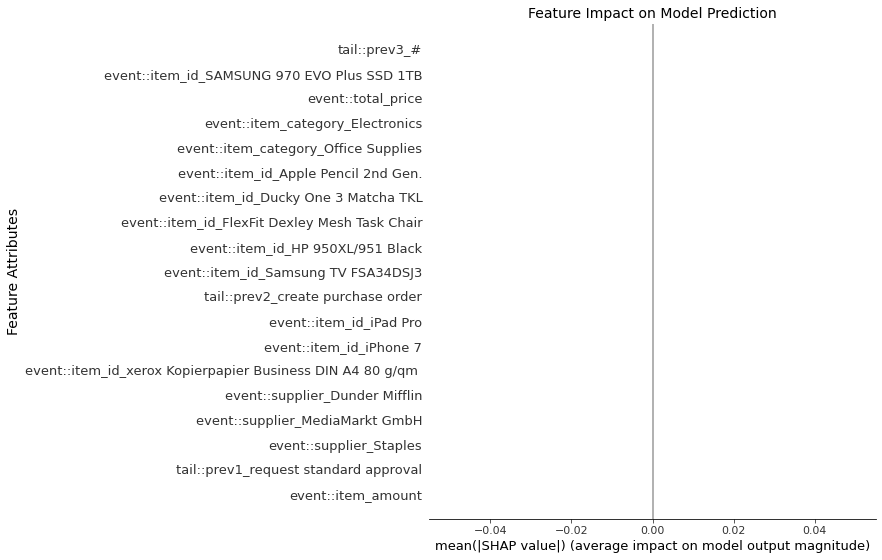

In [11]:
print("Decision point: ", decision_points[0])
nn_guard = dpn_base.get_guard_at_place(decision_points[0])
if nn_guard.is_explainable():
    nn_guard.get_explainable_representation()

Decision point:  ({'request manager approval'}, {'manager approve purchase', 'manager reject purchase'})


  0%|          | 0/100 [00:00<?, ?it/s]

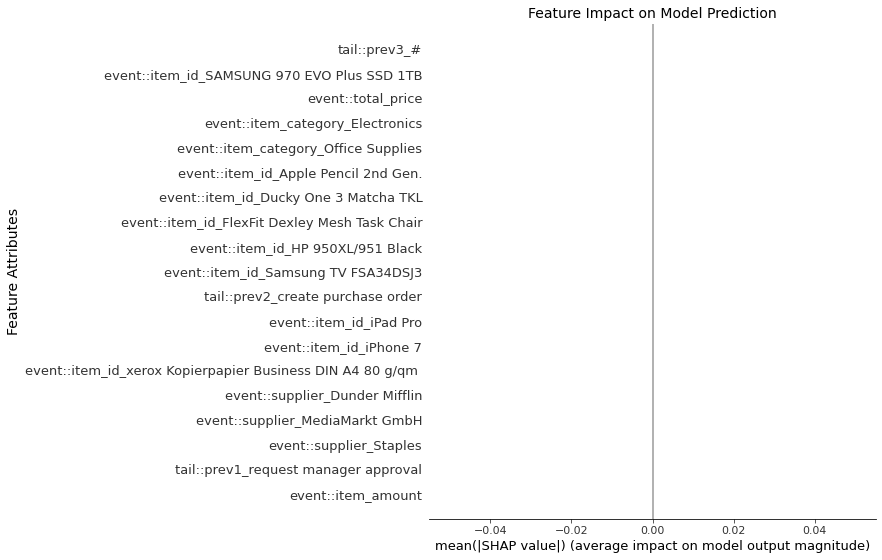

In [12]:
print("Decision point: ", decision_points[1])
nn_guard = dpn_base.get_guard_at_place(decision_points[1])
if nn_guard.is_explainable():
    nn_guard.get_explainable_representation()

Decision point:  ({'create purchase order'}, {'request manager approval', 'request standard approval'})


  0%|          | 0/100 [00:00<?, ?it/s]

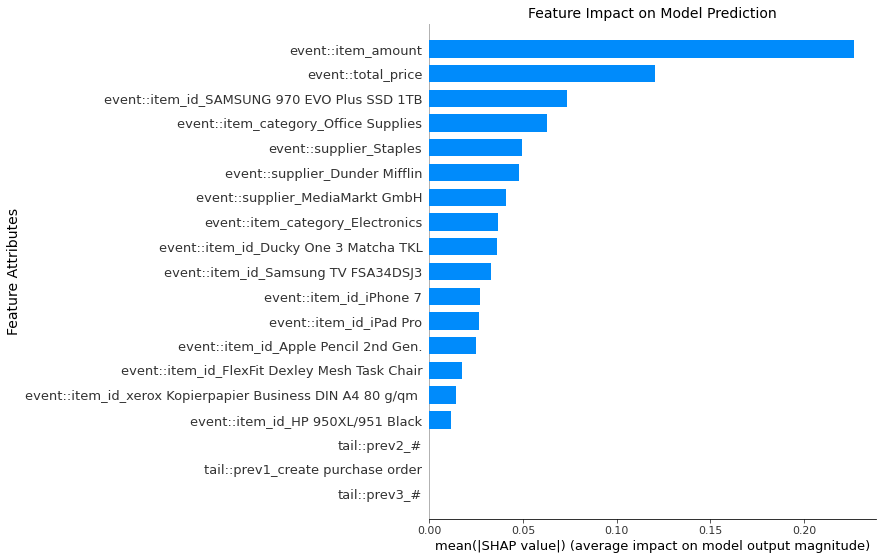

In [13]:
print("Decision point: ", decision_points[2])
nn_guard = dpn_base.get_guard_at_place(decision_points[2])
if nn_guard.is_explainable():
    nn_guard.get_explainable_representation()

### Support Vector Machine 

In [14]:
# import event log and create data petri net
event_log_base = import_log(os.path.join(os.getcwd(), '..', 'datasets', 'p2p_base.xes'))
dpn_base = data_petri_net.Data_Petri_Net(event_log = event_log_base, 
                                                  event_level_attributes = ['item_category','item_id','item_amount','supplier','total_price'],
                                                  ml_list = [ML_Technique.SVM],
                                                  verbose = False)

decision_points = list(dpn_base.decision_points)

Decision point:  ({'request manager approval'}, {'manager approve purchase', 'manager reject purchase'})


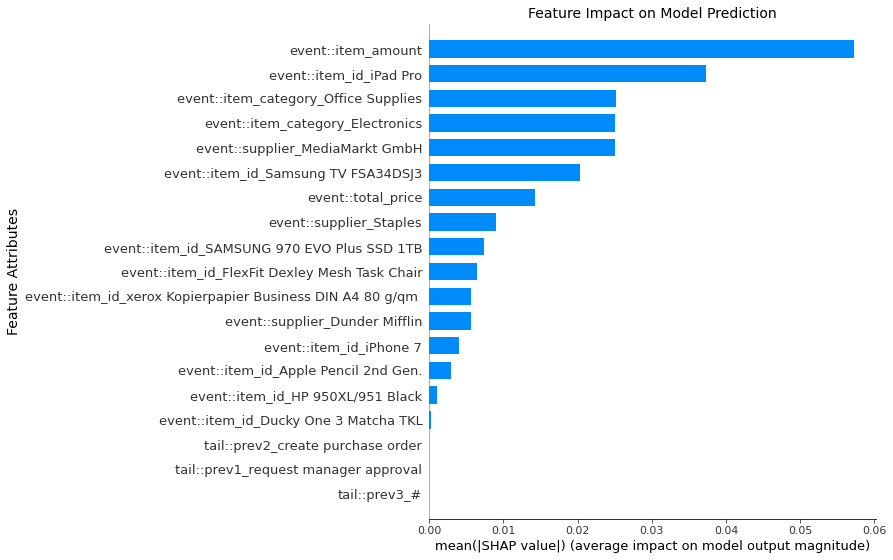

In [15]:
print("Decision point: ", decision_points[0])
svm_guard = dpn_base.get_guard_at_place(decision_points[0])
if svm_guard.is_explainable():
    svm_guard.get_explainable_representation()

Decision point:  ({'create purchase order'}, {'request manager approval', 'request standard approval'})


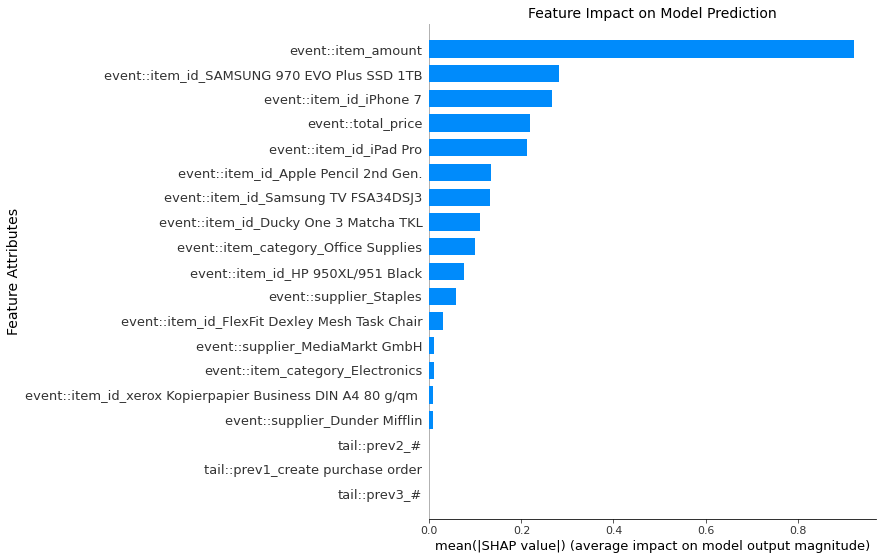

In [16]:
print("Decision point: ", decision_points[1])
svm_guard = dpn_base.get_guard_at_place(decision_points[1])
if svm_guard.is_explainable():
    svm_guard.get_explainable_representation()

Decision point:  ({'request standard approval'}, {'approve purchase', 'reject purchase'})


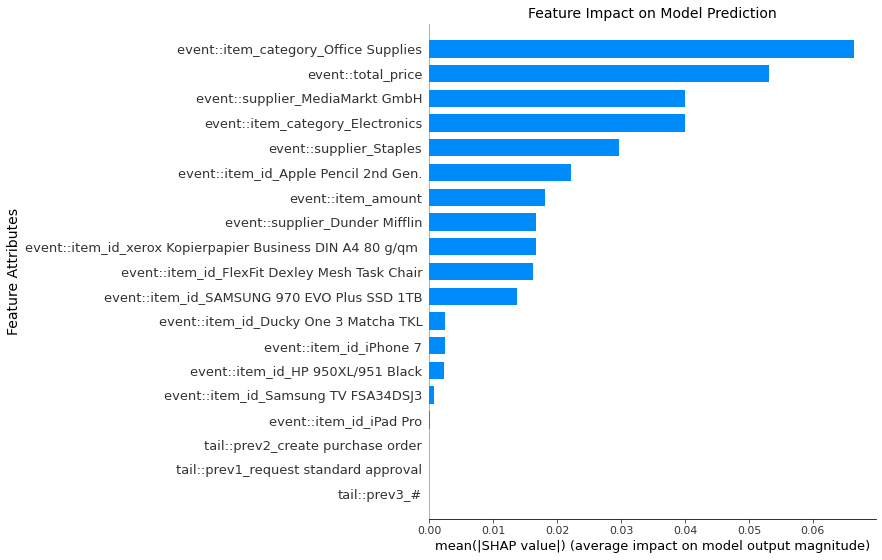

In [17]:
print("Decision point: ", decision_points[2])
svm_guard = dpn_base.get_guard_at_place(decision_points[2])
if svm_guard.is_explainable():
    svm_guard.get_explainable_representation()

### Logistic Regression 

In [18]:
# import event log and create data petri net
event_log_base = import_log(os.path.join(os.getcwd(), '..', 'datasets', 'p2p_base.xes'))
dpn_base = data_petri_net.Data_Petri_Net(event_log = event_log_base, 
                                                  event_level_attributes = ['item_category','item_id','item_amount','supplier','total_price'],
                                                  ml_list = [ML_Technique.LR],
                                                  verbose = False)

decision_points = list(dpn_base.decision_points)

Decision point:  ({'create purchase order'}, {'request manager approval', 'request standard approval'})


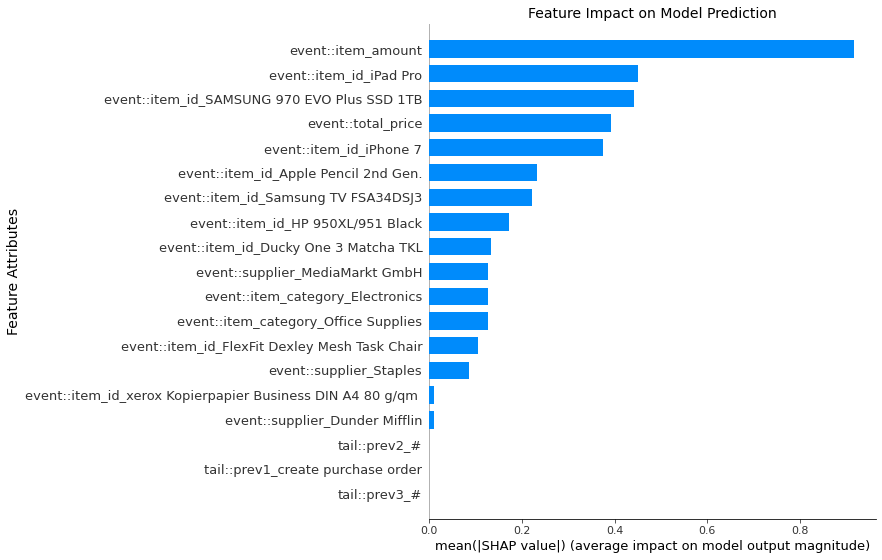

In [19]:
print("Decision point: ", decision_points[0])
lr_guard = dpn_base.get_guard_at_place(decision_points[0])
if lr_guard.is_explainable():
    lr_guard.get_explainable_representation()

Decision point:  ({'request manager approval'}, {'manager approve purchase', 'manager reject purchase'})


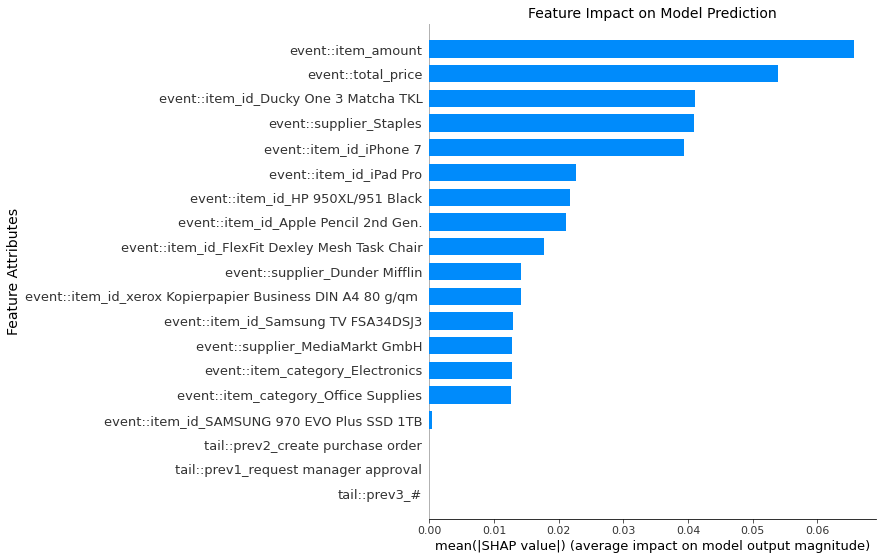

In [20]:
print("Decision point: ", decision_points[1])
lr_guard = dpn_base.get_guard_at_place(decision_points[1])
if lr_guard.is_explainable():
    lr_guard.get_explainable_representation()

Decision point:  ({'request standard approval'}, {'approve purchase', 'reject purchase'})


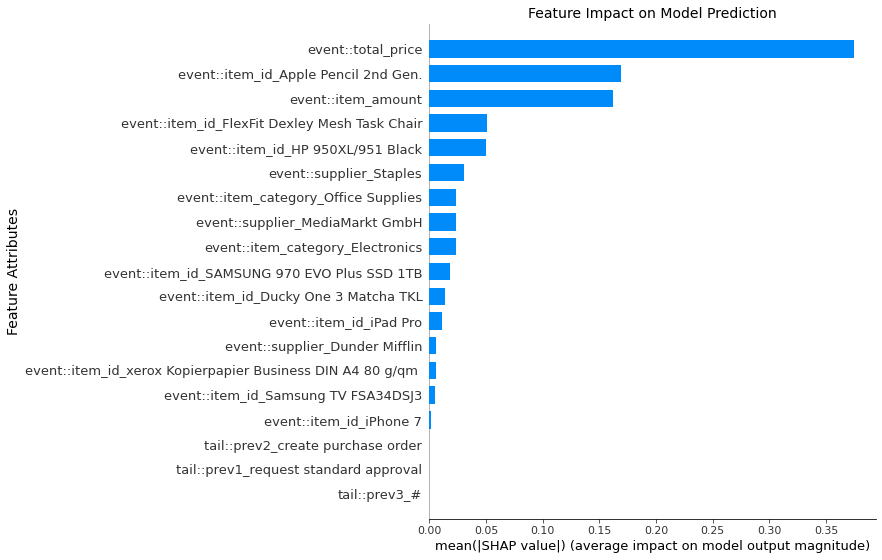

In [21]:
print("Decision point: ", decision_points[2])
lr_guard = dpn_base.get_guard_at_place(decision_points[2])
if lr_guard.is_explainable():
    lr_guard.get_explainable_representation()

### Summary event log with some Randomness:

- Request Manager or Standard Approval:  
Only the Decision Tree guard models the true underlying guard. The split to classify the data samples is total_price <= 808. For the other three machine learning techniques the feature attribute item_amount has a huge impact on the model prediction, this attribute is correlated with total_price.

- Manager Rejection or Approval:  
All machine learning techniques have problems modeling the true underlying guard. We can see that the Support Vector Machine guard again uses item_amout for its prediction. Logistic Regression guard seems to pick up noise instead of the true underlying guard. But it is possible that the features with the most impact correlate with the total_price. For the Neural Network guard all feature attributes only have a very small impact on the model prediction, thus the plot is empty.

- Standard Rejection or Approval:  
Again, all techniques struggle to model the true underlying guard. Only for the Logistic Regression guard total_price is the feature attribute with the highest impact. The Support Vector Machine guard seems to pick up noise instead of the true underlying guard. But it could also be possible that the features with the most impact correlate with the total_price (e.g., maybe "Office Supplies" often have a total_price >= or < 500). For the Neural Network guard all feature attributes only have a very small impact on the model prediction, thus the plot is empty.
    

Overall, all machine learning techniques have their problems modeling the true underlying behavior of the guard if the decisions are partly random. But we can also see, that for example the Decision Tree is at advantage for modeling a binary numeric decision with some overlapping, while the other three techniques are able to detect some correlation between other feature attributes and the feature attribute used in the true guard. Nevertheless all four machine learning guards achieve high performance scores measures using F1-score as seen in the comparision plots.